In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
csv_path= '/Users/y1u0d2/Desktop/Lab/result/sf/merge_base/merge_O-O.csv'

In [30]:
df = pd.read_csv(csv_path)
df.columns
descriptor_labels = []
for column in df.columns:
    if 'sf_' in column:
        descriptor_labels.append(column)

descriptor_labels
target_label ='E'
df

,Unnamed: 0,another_atom,center_atom,structure_idx,structure,sf_Si-Si_e-14.92_rs-1.0,sf_Si-Si_e-9.411_rs-1.259,sf_Si-Si_e-5.938_rs-1.585,sf_Si-Si_e-3.747_rs-1.995,sf_Si-Si_e-2.364_rs-2.512,sf_Si-Si_e-1.492_rs-3.162,sf_Si-Si_e-0.9411_rs-3.981,sf_Si-Si_e-0.5938_rs-5.012,sf_Si-Si_e-0.3747_rs-6.31,sf_Si-Si_e-0.2364_rs-7.943,natom,E,Vol,E_atom
0,0,Si,Si,1,stishovite,3.336003e-18,1.039047e-07,0.027985,8.788869,103.047777,290.917993,383.622202,508.795206,585.854566,446.302122,48,-1011.513117,375.998967,-21.073190
1,1,Si,Si,2,stishovite,3.335982e-18,1.039040e-07,0.027985,8.788815,103.047524,290.918274,383.622856,508.795797,585.855004,446.302355,48,-1011.512301,375.998967,-21.073173
2,2,Si,Si,3,stishovite,3.335994e-18,1.039044e-07,0.027985,8.788847,103.047791,290.918665,383.622941,508.795920,585.855056,446.302387,48,-1011.511924,375.998967,-21.073165
3,3,Si,Si,4,stishovite,3.336044e-18,1.039059e-07,0.027987,8.811162,103.659010,290.758652,382.853730,508.519589,585.799752,446.305812,48,-1011.510616,375.998967,-21.073138
4,4,Si,Si,5,stishovite,3.336026e-18,1.039054e-07,0.027987,8.811055,103.656770,290.757739,382.855221,508.520279,585.799811,446.299429,48,-1011.509573,375.998967,-21.073116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,8545,Si,Si,796,beta-quartz,3.851941e-24,1.928036e-11,0.000126,0.508397,29.285895,108.250442,170.889450,306.785217,281.525797,215.566757,36,-758.022768,568.346340,-21.056188
8546,8546,Si,Si,797,beta-quartz,3.858548e-24,1.933783e-11,0.000130,0.534858,29.420306,107.486519,169.151282,307.416340,284.044139,217.060100,36,-757.969240,568.346340,-21.054701
8547,8547,Si,Si,798,beta-quartz,8.212942e-24,4.090745e-11,0.000239,0.663645,30.039609,106.733690,170.262802,306.620348,283.252469,216.275549,36,-757.816104,568.346340,-21.050447
8548,8548,Si,Si,799,beta-quartz,8.368814e-24,4.170190e-11,0.000246,0.694090,30.390220,105.720995,170.101313,307.674728,282.532252,216.480323,36,-757.760477,568.346340,-21.048902


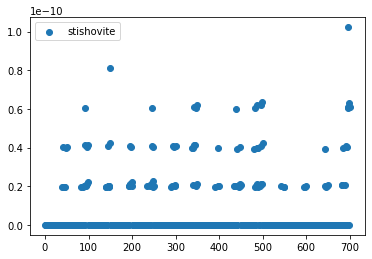

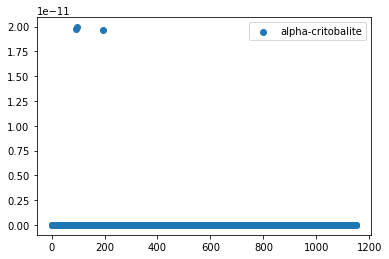

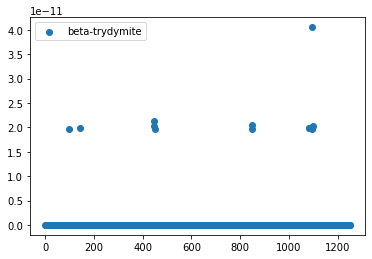

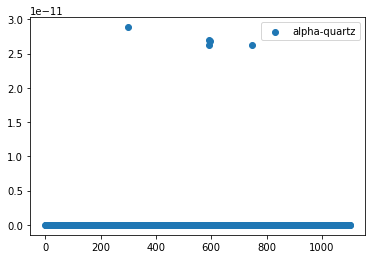

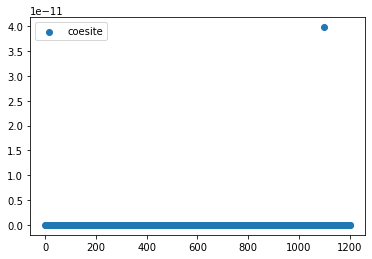

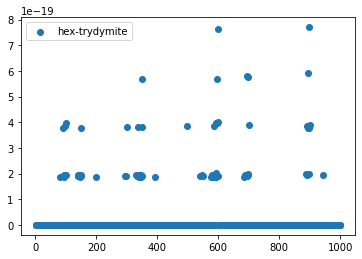

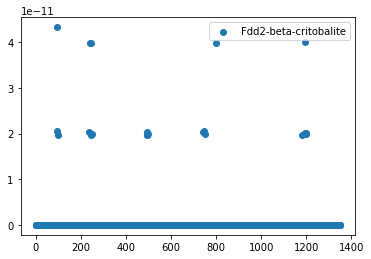

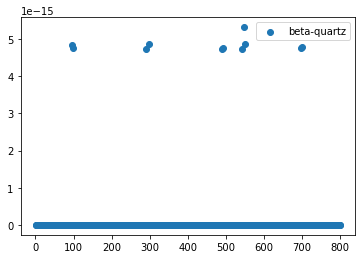

In [31]:
fig, ax = plt.subplots()
structures = df.structure.unique()
for structure in structures:
    plt.scatter(x=df[df.structure == structure].structure_idx,y=df[df.structure == structure][descriptor_labels[0]],label=structure)
    plt.legend()
    plt.show()

In [32]:
Xraw = df.loc[:, descriptor_labels].values
y = df.loc[:, target_label].values

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xraw)
X = scaler.transform(Xraw)

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
reg = LinearRegression()
reg.fit(X,y)
yp = reg.predict(X)
all_r2_score = reg.score(X,y)
print(all_r2_score)
print(reg.coef_, reg.intercept_)

0.8668260681263558
[ 2.36042068e+03 -2.75660297e+03  6.40327516e+02 -3.53780079e+02
  4.02665523e+01  3.32733084e+01  5.60144728e+02 -4.11140179e+01
 -9.31074496e-02 -3.83134996e+02] -883.8373492759289


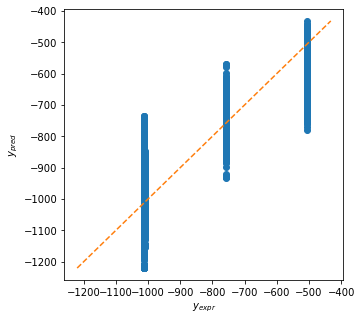

In [35]:
# 当てはめ度合い
plt.figure(figsize=(5,5))
yall = np.hstack([y,yp])
ylim = yall.min(), yall.max()
plt.plot(y,yp,"o")
plt.plot(ylim,ylim,"--")
plt.xlabel("$y_{expr}$")
plt.ylabel("$y_{pred}$")
plt.show()